# Fourier Transforms

<b> Functions in this section: </b> .real, .imag, np.abs, fft module, fft.rfft, fft.rfftfreq, fft.irfft, fft.rfft2, fft.irfft2

In [1]:
import numpy as np

## Complex Numbers

### Complex Numbers in Python

In [2]:
imag = 1j

In [3]:
type(imag)

complex

In [4]:
imag ** 2

(-1+0j)

In [5]:
complex_num = 3 + 2j

In [6]:
complex_num * imag

(-2+3j)

In [7]:
complex_num.real

3.0

In [8]:
complex_num.imag

2.0

In [9]:
abs(complex_num)

3.605551275463989

### Complex Vectors in NumPy

In [10]:
complex_vect = np.array([imag, complex_num])
complex_vect

array([0.+1.j, 3.+2.j])

In [11]:
complex_vect.dtype

dtype('complex128')

In [12]:
complex_vect.real

array([0., 3.])

In [13]:
complex_vect.imag

array([1., 2.])

In [14]:
np.abs(complex_vect)

array([1.        , 3.60555128])

## 1D Discrete Fourier Transform

In [15]:
from numpy import fft
import matplotlib.pyplot as plt

In [16]:
num_samples = 400
samples_freq = 1/200
times = np.linspace(0, samples_freq * num_samples, num_samples)

In [17]:
# Has Frequency 10
simple_signal = np.sin(20 * np.pi * times)

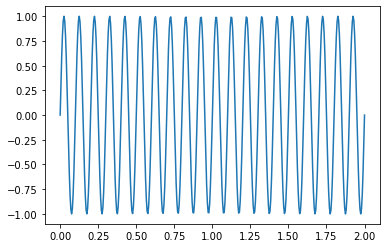

In [18]:
plt.plot(times, simple_signal)

In [19]:
f_sin = fft.rfft(simple_signal)
frequency_range = fft.rfftfreq(num_samples, samples_freq)

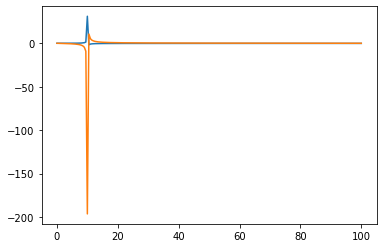

In [20]:
plt.plot(frequency_range, f_sin.real)
plt.plot(frequency_range, f_sin.imag)

In [21]:
two_freq = np.sin(50 * np.pi * times) + np.sin(8 * np.pi * times)

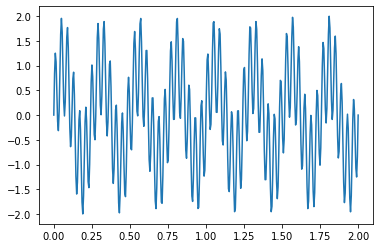

In [22]:
plt.plot(times, two_freq)

In [23]:
f_two_freq = fft.rfft(two_freq)

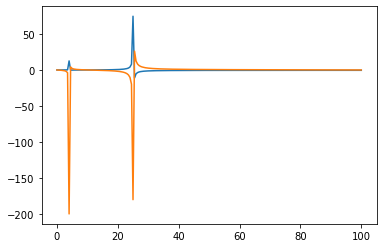

In [24]:
plt.plot(frequency_range, f_two_freq.real)
plt.plot(frequency_range, f_two_freq.imag)

In [25]:
f_two_freq[10:] = 0

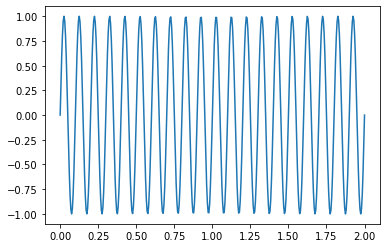

In [26]:
plt.plot(times, fft.irfft(f_sin))

## Smothing of a signal

In [27]:
times = np.linspace(0, 2, 600)

In [28]:
signal = 20 * np.exp(-np.cos(30 * np.pi * times) ** 2) * (np.cos(10 * np.pi * times) + np.sin(100 * np.pi * times))

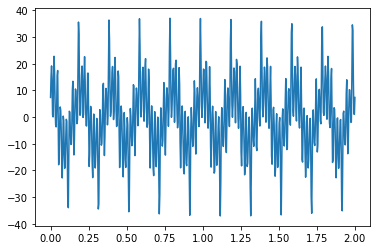

In [29]:
plt.plot(times, signal)

In [30]:
freq_signal = fft.rfft(signal)
frequency_range = fft.rfftfreq(600, 1/400)

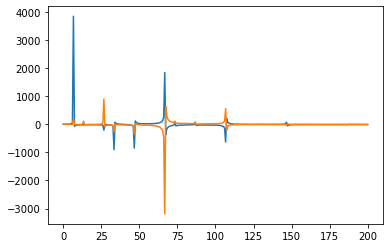

In [31]:
plt.plot(frequency_range, freq_signal.real)
plt.plot(frequency_range, freq_signal.imag)

In [32]:
freq_signal[frequency_range > 50] = 0

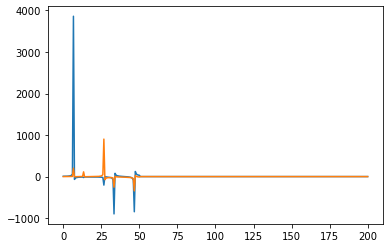

In [33]:
plt.plot(frequency_range, freq_signal.real)
plt.plot(frequency_range, freq_signal.imag)

In [34]:
smooth = fft.irfft(freq_signal)

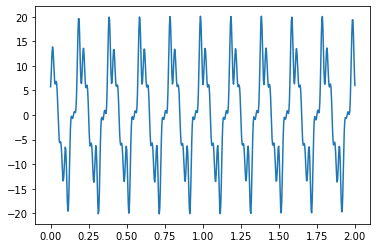

In [35]:
plt.plot(times, smooth)

## 2D Fourier Transform

In [36]:
from skimage.data import camera

In [37]:
camera = camera()

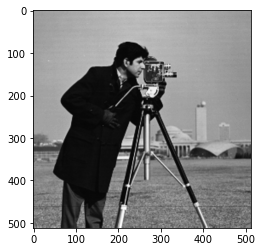

In [38]:
plt.imshow(camera, cmap = plt.cm.gray)

In [39]:
F_camera = fft.rfft2(camera)
F_camera.shape

(512, 257)

In [40]:
log = np.log(1 + np.abs(F_camera)) / np.log(1 + np.abs(F_camera).max())

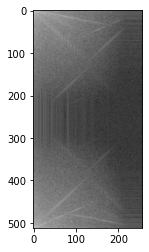

In [41]:
plt.imshow(log, cmap = plt.cm.gray)

In [42]:
np.count_nonzero(F_camera)

131584

Try 10 000 and 50 000

In [43]:
F_camera[np.abs(F_camera) < 50000] = 0

In [44]:
log = np.log(1 + np.abs(F_camera)) / np.log(1 + np.abs(F_camera).max())

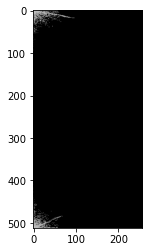

In [45]:
plt.imshow(log, cmap = plt.cm.gray)

In [46]:
np.count_nonzero(F_camera)

1942

In [47]:
compressed = fft.irfft2(F_camera)

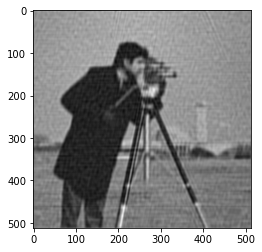

In [48]:
plt.imshow(compressed, cmap = plt.cm.gray)